In [1]:
import numpy as np
import matplotlib.pyplot as plt

k = 0.9

In [2]:
def _LAI_1(w):
    LA = -0.0025 * w ** 2 + 0.072 * w
    A = 0.02 * w
    if w > 2.4:
        A = 0.02 * 2.4
    return LA / A

def _LAI_2(w):
    if w <= 2.4:
        return -.125 * w + 3.6
    else:
        return -0.0516 * w ** 2 + 1.49 * w
    
def _LAI_3(w):
    LAI = -0.0516 * w ** 2 + 1.49 * w
    if w < 2.4:
        return 3.3
    elif w > 13.76:
        return 10.733
    else:
        return LAI
    
def _LAI_4(w):
    LAI = _LAI_2(w)
    if LAI < 0:
        return 0
    return LAI
    
def _expLAI(lai):
    return np.exp(-k * lai)

def _switch(left, right, on, loc, k):
    sig = 1 / (1 + np.exp(-k * (on - loc)))
    return (1 - sig) * left + sig * right

/home/nwoodbury/.virtualenvs/aquaponics/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  


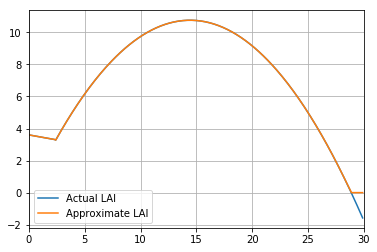

In [3]:
ws = np.arange(0, 30, 0.1)
lai1 = [_LAI_1(w) for w in ws]
lai2 = [_LAI_2(w) for w in ws]
lai3 = [_LAI_3(w) for w in ws]
lai4 = [_LAI_4(w) for w in ws]

plt.figure()
# plt.plot(ws, lai1, label='Index 1')
plt.plot(ws, lai2, label='Actual LAI')
# plt.plot(ws, lai3, label='Index 3')
plt.plot(ws, lai4, label='Approximate LAI')
plt.xlim(0, 30)
plt.legend()
plt.grid()

In [7]:
mx = 1.42 / (2 * 0.0516)
mxval = _LAI_2(mx)
print('Max at w = {:.3f}, value = {:.3f}'.format(mx, mxval))
lower = -.125 * 2.4 + 3.6
print('Lower at w = {:.3f}'.format(lower))

Max at w = 13.760, value = 10.733
Lower at w = 3.300


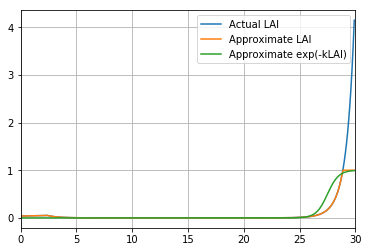

In [4]:
exp2 = [_expLAI(lai) for lai in lai2]
exp3 = [_expLAI(lai) for lai in lai3]
exp4 = [_expLAI(lai) for lai in lai4]
exp5 = [_switch(0, 1, w, 27.5, 2) for w in ws]

plt.figure()
plt.plot(ws, exp2, label='Actual LAI')
# plt.plot(ws, exp3, label='Index 3')
plt.plot(ws, exp4, label='Approximate LAI')
plt.plot(ws, exp5, label='Approximate exp(-kLAI)')
plt.xlim(0, 30)
plt.legend()
plt.grid()

In [12]:
print(min(exp4))

6.248390214985222e-05
